# Telco Customer Churn - ML Prediction

This initiative aims to identify customers who are likely to leave our services, allowing us to take proactive measures to retain them. Predicting churn will help us improve customer satisfaction and reduce revenue losses.

**Objectives**
1. **Develop a machine learning model** to predict customer churn with high accuracy.
2. **Analyze customer data** to identify key factors contributing to churn.
3. **Implement actionable insights** to reduce churn based on model predictions.
4. **Evaluate model performance** using metrics such as precision, recall, F1-score, and ROC-AUC.


**About  the Dataset**

A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

**Data Description**

7043 observations with 33 variables

***CustomerID:*** A unique ID that identifies each customer.

***Count:*** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

***Country:*** The country of the customer’s primary residence.

***State:*** The state of the customer’s primary residence.

***City:*** The city of the customer’s primary residence.

***Zip Code:*** The zip code of the customer’s primary residence.

***Lat Long:*** The combined latitude and longitude of the customer’s primary residence.

***Latitude:*** The latitude of the customer’s primary residence.

***Longitude:*** The longitude of the customer’s primary residence.

***Gender:*** The customer’s gender: Male, Female

***Senior Citizen:*** Indicates if the customer is 65 or older: Yes, No

***Partner:*** Indicate if the customer has a partner: Yes, No

***Dependents:*** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

***Tenure Months:*** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

***Phone Service:*** Indicates if the customer subscribes to home phone service with the company: Yes, No

***Multiple Lines:*** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

***Internet Service:*** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

***Online Security:*** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

***Online Backup:*** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

***Device Protection:*** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

***Tech Support:*** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

***Streaming TV:*** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

***Streaming Movies:*** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional 
fee for this service.

***Contract:*** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

***Paperless Billing:*** Indicates if the customer has chosen paperless billing: Yes, No

***Payment Method:*** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

***Monthly Charge:*** Indicates the customer’s current total monthly charge for all their services from the company.

***Total Charges:*** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

***Churn Label:*** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

***Churn Value:*** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

***Churn Score:*** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

***CLTV:*** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

***Churn Reason:*** A customer’s specific reason for leaving the company. Directly related to Churn Category.

**Install dependencies**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

**Data collection and processing**

In [2]:
df = pd.read_excel('/kaggle/input/telco-customer-churn/Telco_customer_churn.xlsx')

df.head(10)

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   
5  4190-MFLUW      1  United States  California  Los Angeles     90020   
6  8779-QRDMV      1  United States  California  Los Angeles     90022   
7  1066-JKSGK      1  United States  California  Los Angeles     90024   
8  6467-CHFZW      1  United States  California  Los Angeles     90028   
9  8665-UTDHZ      1  United States  California  Los Angeles     90029   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   
5  34.066367, -118.309868  34.066367 -118.309868  Female  ...  Month-to-month   
6   34.02381, -118.156582  34.023810 -118.156582    Male  ...  Month-to-month   
7  34.066303, -118.435479  34.066303 -118.435479    Male  ...  Month-to-month   
8  34.099869, -118.326843  34.099869 -118.326843    Male  ...  Month-to-month   
9  34.089953, -118.294824  34.089953 -118.294824    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   
5                No    Credit card (automatic)            55.20        528.35   
6               Yes           Electronic check            39.65         39.65   
7                No               Mailed check            20.15         20.15   
8               Yes           Electronic check            99.35       4749.15   
9                No           Electronic check            30.20          30.2   

  Churn Label Churn Value Churn Score  CLTV  \
0         Yes           1          86  3239   
1         Yes           1          67  2701   
2         Yes           1          86  5372   
3         Yes           1          84  5003   
4         Yes           1          89  5340   
5         Yes           1          78  5925   
6         Yes           1         100  5433   
7         Yes           1          92  4832   
8         Yes           1          77  5789   
9         Yes           1          97  2915   

                                Churn Reason  
0               Competitor made better offer  
1                                      Moved  
2                                      Moved  
3                                      Moved  
4              Competitor had better devices  
5  Competitor offered higher download speeds  
6               Competitor offered more data  
7               Competitor made better offer  
8              Competitor had better devices  
9              Competitor had better devices  

[10 rows x 33 columns]

In [3]:
df.shape

(7043, 33)

In [4]:
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
df['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [8]:
df['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [9]:
df['Zip Code'].value_counts()

Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [11]:
df['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

In [12]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [13]:
df['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

In [14]:
 df['Tenure Months'].value_counts()

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [15]:
 df['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

In [16]:
  df['Multiple Lines'].value_counts()

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [17]:
  df['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [18]:
  df['Online Security'].value_counts()

Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [19]:
df['Online Backup'].value_counts()

Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [20]:
df['Device Protection'].value_counts()

Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [21]:
df['Tech Support'].value_counts()

Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [22]:
df['Streaming TV'].value_counts()

Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [23]:
df['Streaming Movies'].value_counts()

Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [24]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [25]:
df['Paperless Billing'].value_counts()

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

In [26]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [27]:
df['Monthly Charges'].value_counts()

Monthly Charges
20.05     61
19.85     45
19.95     44
19.90     44
19.65     43
          ..
112.55     1
117.15     1
29.40      1
67.40      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [28]:
df['Total Charges'].value_counts()

Total Charges
20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [29]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [30]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [31]:
df['Churn Score'].value_counts()

Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 85, dtype: int64

In [32]:
df['CLTV'].value_counts()

CLTV
5546    8
4741    7
5527    7
5092    7
4745    7
       ..
2364    1
3003    1
5280    1
3269    1
5553    1
Name: count, Length: 3438, dtype: int64

In [33]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [34]:
df.to_csv('df.csv', index=False, sep=',', na_rep='None', float_format='%.2f')

**Data visualization**

In [35]:
sns.set()

/tmp/ipykernel_33/363815644.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure Months'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


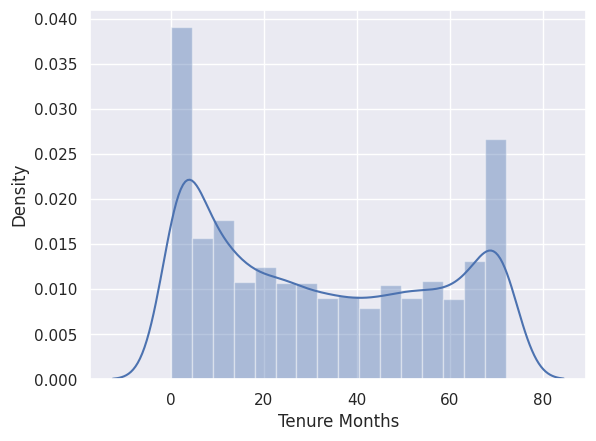

In [36]:
# finding the distribution of Tenure Months column
sns.distplot(df['Tenure Months'])

plt.show()

- Most people never made it past the first month and churned. However, if someone made it past the first month they were likely to stay much longer which is 72months.

To reduce churn within the first month and improve long-term retention, we suggest to implement these strategies:
- Seamless Onboarding: Simplify the onboarding process with clear guidance and a welcome package to help new users get started quickly.
- Initial Engagement: Offer incentives for the first month and conduct personalized check-ins to address any issues.
- Proactive Support: Provide responsive and dedicated support to assist new customers and resolve any problems promptly.
- Value Demonstration: Clearly communicate the key benefits and set usage milestones with rewards to reinforce the value of your service.
- Feedback and Improvement: Collect feedback from new users and use it to continuously enhance the onboarding experience and service quality.

/tmp/ipykernel_33/786436410.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly Charges'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


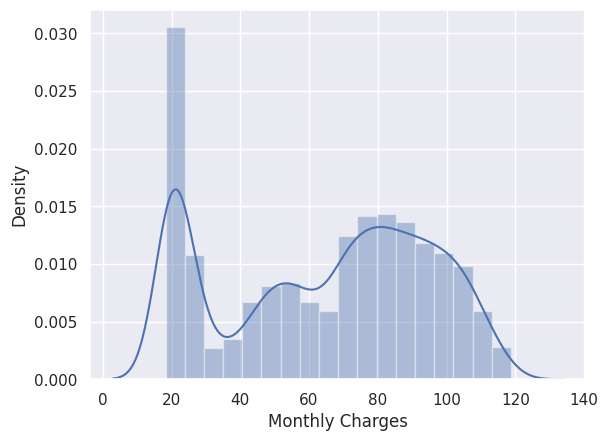

In [37]:
# finding the distribution of Monthly Charges column
sns.distplot(df['Monthly Charges'])

plt.show()

- Most people pay a monthly charge of $20

/tmp/ipykernel_33/763882889.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dependent_counts = df.groupby(['Monthly Charges Bin', 'Dependents']).size().unstack().fillna(0)


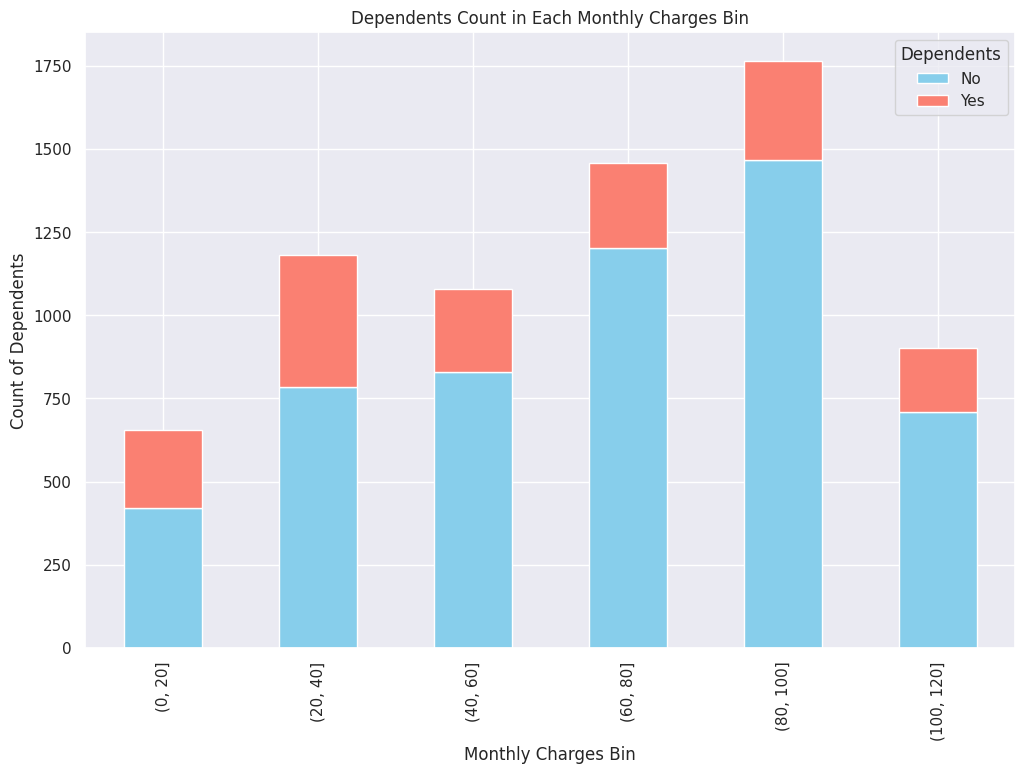

In [38]:
# Plot the distribution of Dependents Count in Each Monthly Charges Bin

# Create bins for 'Monthly Charges' with a width of 20
bins = range(0, int(df['Monthly Charges'].max()) + 20, 20)
df['Monthly Charges Bin'] = pd.cut(df['Monthly Charges'], bins)

# Count the number of 'Yes' and 'No' dependents in each bin
dependent_counts = df.groupby(['Monthly Charges Bin', 'Dependents']).size().unstack().fillna(0)

# Plotting
ax = dependent_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'salmon'])

# Adding titles and labels
plt.title('Dependents Count in Each Monthly Charges Bin')
plt.xlabel('Monthly Charges Bin')
plt.ylabel('Count of Dependents')
plt.xticks(rotation=90)
plt.legend(title='Dependents')

# Show plot
plt.show()

- Generally people with dependents pay less monthly charges that those without

Suggestions: 
- Introduce family plans that provide discounted rates or bundled services for customers with dependents. This can make your offerings more attractive to families and ensure they get more value for their money.
- Allow customers to customize their packages based on their needs. This can help customers without dependents find cost-effective options that suit their usage patterns without feeling they are overpaying.
- Offer incentives such as discounts or additional benefits for high-usage customers without dependents. This can balance out the lower monthly charges paid by those with dependents.
- Consider implementing usage-based pricing where customers pay based on their actual usage. This can ensure fair pricing for both high-usage and low-usage customers, regardless of their family status.
- Educate all customers about the full range of services and benefits available to them. Highlight how they can optimize their plans to get the best value, regardless of whether they have dependents.

/tmp/ipykernel_33/1218193223.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bin_means = df.groupby('Monthly Charges Bin')['Tenure Months'].mean().reset_index()
/tmp/ipykernel_33/1218193223.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_bin_means = df.groupby('Tenure Months Bin')['Monthly Charges'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

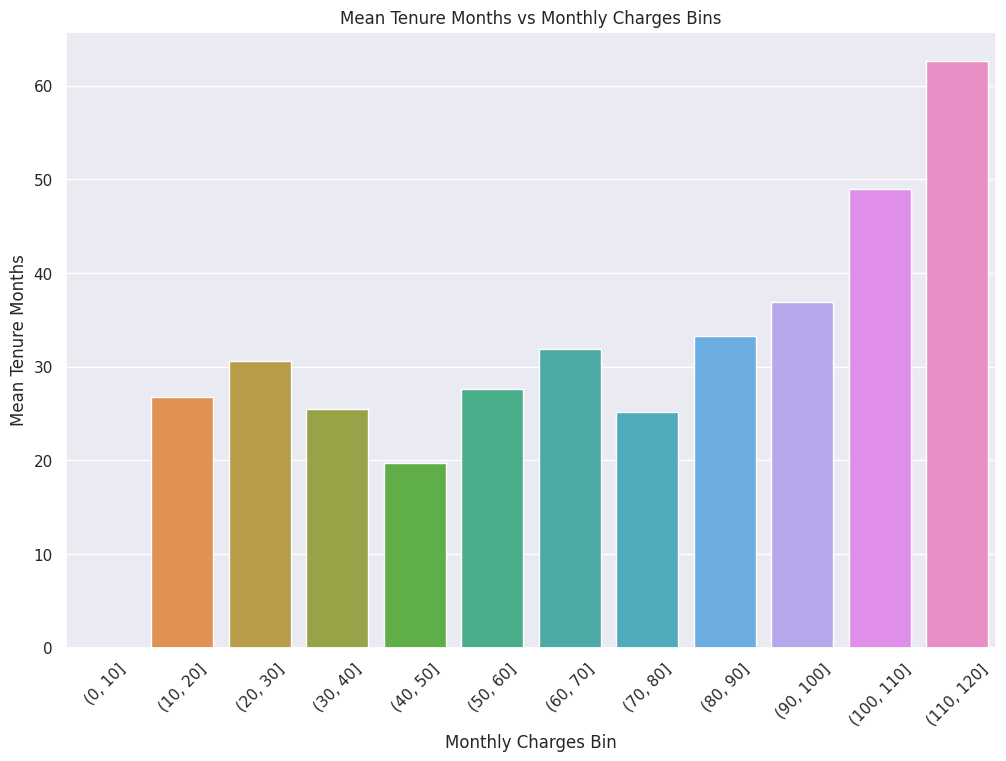

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


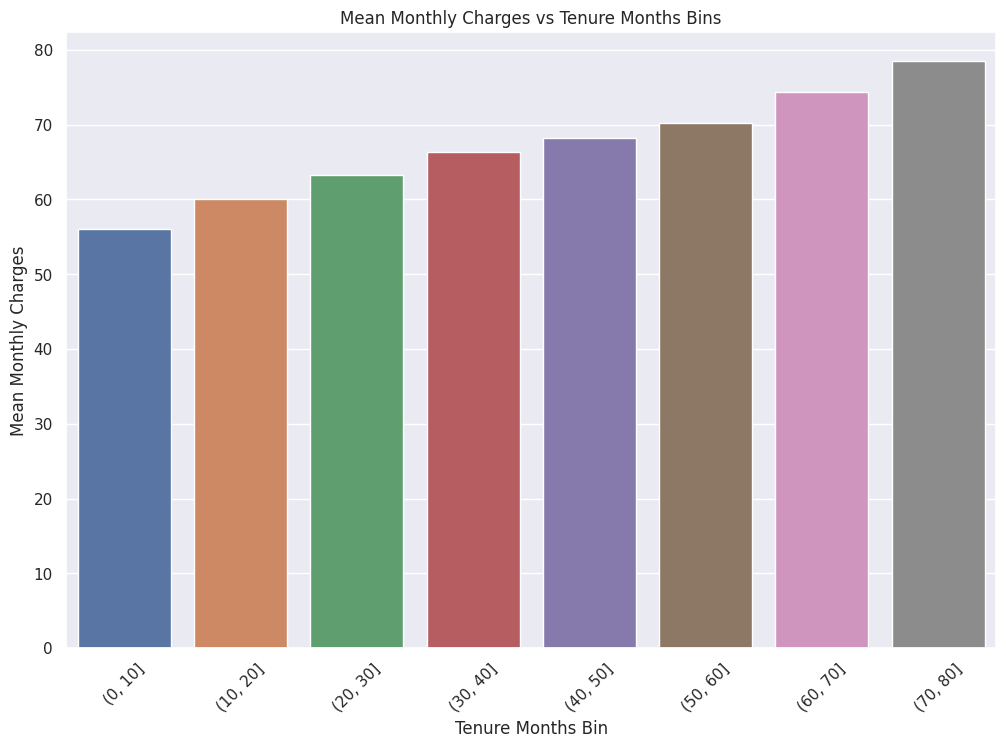

In [39]:
# Create bins for 'Monthly Charges' and 'Tenure Months'
monthly_bins = range(0, int(df['Monthly Charges'].max()) + 10, 10)
tenure_bins = range(0, int(df['Tenure Months'].max()) + 10, 10)

df['Monthly Charges Bin'] = pd.cut(df['Monthly Charges'], bins=monthly_bins)
df['Tenure Months Bin'] = pd.cut(df['Tenure Months'], bins=tenure_bins)

# Calculate the mean 'Tenure Months' for each 'Monthly Charges' bin
monthly_bin_means = df.groupby('Monthly Charges Bin')['Tenure Months'].mean().reset_index()

# Calculate the mean 'Monthly Charges' for each 'Tenure Months' bin
tenure_bin_means = df.groupby('Tenure Months Bin')['Monthly Charges'].mean().reset_index()

# Plotting 'Monthly Charges' on x-axis and mean 'Tenure Months' on y-axis
plt.figure(figsize=(12, 8))
sns.barplot(x='Monthly Charges Bin', y='Tenure Months', data=monthly_bin_means)

# Adding titles and labels
plt.title('Mean Tenure Months vs Monthly Charges Bins')
plt.xlabel('Monthly Charges Bin')
plt.ylabel('Mean Tenure Months')
plt.xticks(rotation=45)

# Show plot
plt.show()

# Plotting 'Tenure Months' on x-axis and mean 'Monthly Charges' on y-axis
plt.figure(figsize=(12, 8))
sns.barplot(x='Tenure Months Bin', y='Monthly Charges', data=tenure_bin_means)

# Adding titles and labels
plt.title('Mean Monthly Charges vs Tenure Months Bins')
plt.xlabel('Tenure Months Bin')
plt.ylabel('Mean Monthly Charges')
plt.xticks(rotation=45)

# Show plot
plt.show()

- Customers with higher monthly charges tend to stay longer

To encourage customers with lower monthly charges to stay longer, consider these strategies:
- Enhance Value Perception: Add features and ensure high service quality for lower-priced plans.
- Loyalty Programs: Reward long-term customers with points, discounts, or exclusive benefits.
- Personalized Offers: Provide tailored discounts and upgrade incentives.
- Flexible Plans: Allow plan customization and easy upgrades/downgrades.
- Proactive Customer Support: Conduct regular check-ins and offer dedicated support.
- Educational Content: Educate customers on maximizing plan benefits and optimizing usage.
- Community Building: Host exclusive events and engage customers to build a sense of community.
- Trial Offers: Offer temporary access to premium features and collect feedback for improvement.

/tmp/ipykernel_33/490506137.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_33/490506137.py:21: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  california.plot(ax=ax, color='lightgrey', edgecolor='black')


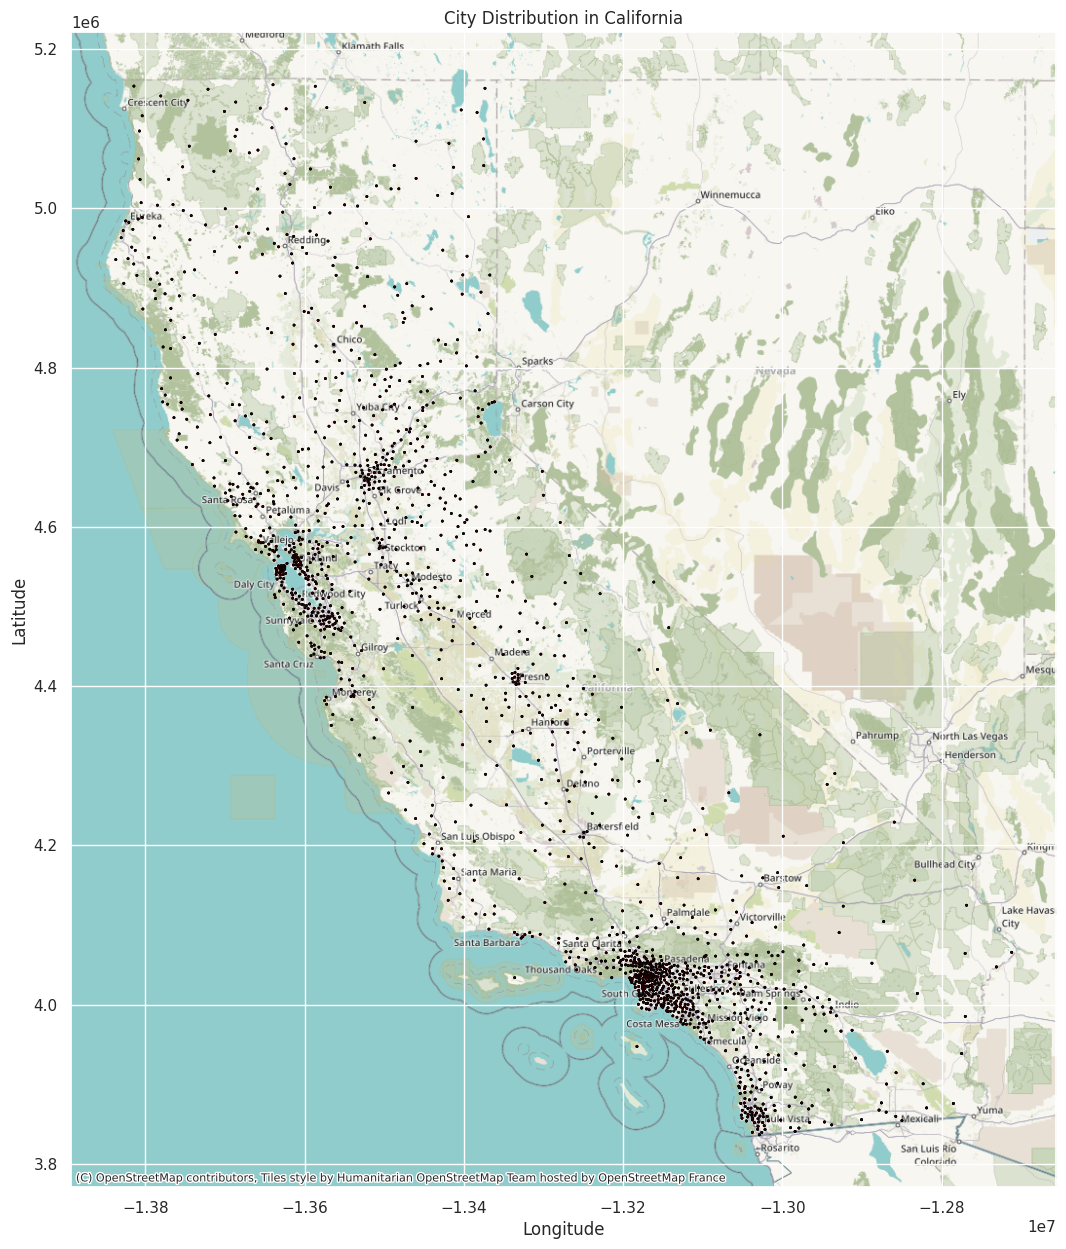

In [40]:
# Plot the distribution of the city column

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
california = world[world.name == 'California']

# Reproject to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)
california = california.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot California boundaries
california.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot city locations with size based on 'Count'
gdf.plot(ax=ax, color='red', markersize=gdf['Count'], alpha=0.7, edgecolor='black')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Set title and labels
plt.title('City Distribution in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

- Majority of subscribers are concentrated in major cities.

/tmp/ipykernel_33/1442873935.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_33/1442873935.py:29: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  california.plot(ax=ax, color='lightgrey', edgecolor='black')


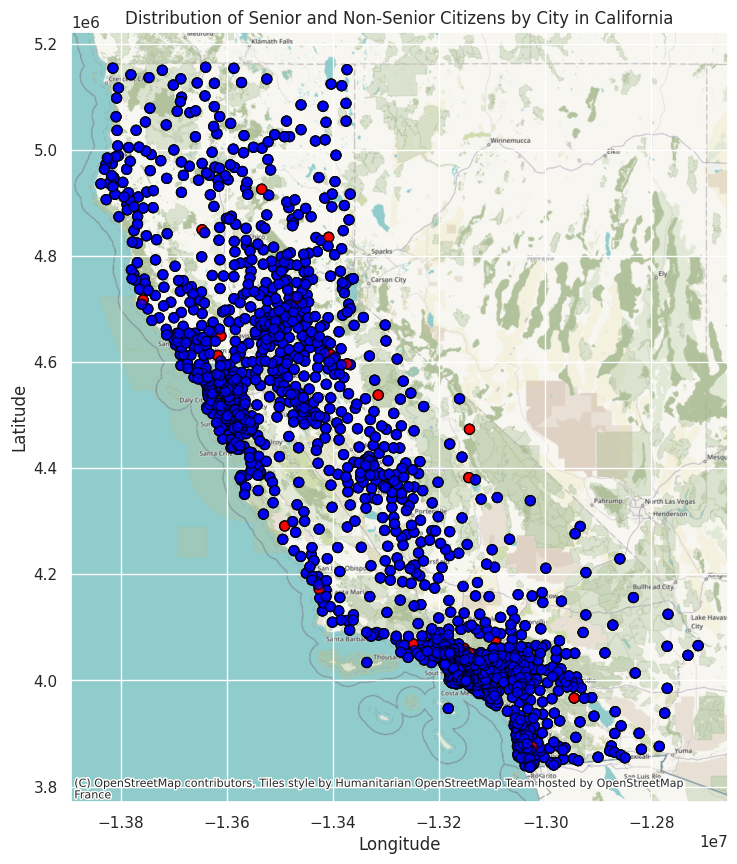

In [41]:
# Plot the distribution of the Senior and Non-Senior Citizens by City in California column

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Load the world map and filter for California
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
california = world[world.name == 'California']

# Reproject to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)
california = california.to_crs(epsg=3857)

# Count senior and non-senior citizens by city
counts = gdf.groupby(['City', 'Senior Citizen']).size().unstack(fill_value=0)

# Determine majority status for each city
counts['Majority'] = counts.idxmax(axis=1)
gdf = gdf.merge(counts[['Majority']], on='City')

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot California boundaries
california.plot(ax=ax, color='lightgrey', edgecolor='black')

# Define colors for senior and non-senior citizens
colors = {'Yes': 'red', 'No': 'blue'}

# Plot city locations with color based on majority status
gdf.plot(ax=ax, color=gdf['Majority'].map(colors), markersize=50, alpha=0.7, edgecolor='black')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Set title and labels
plt.title('Distribution of Senior and Non-Senior Citizens by City in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

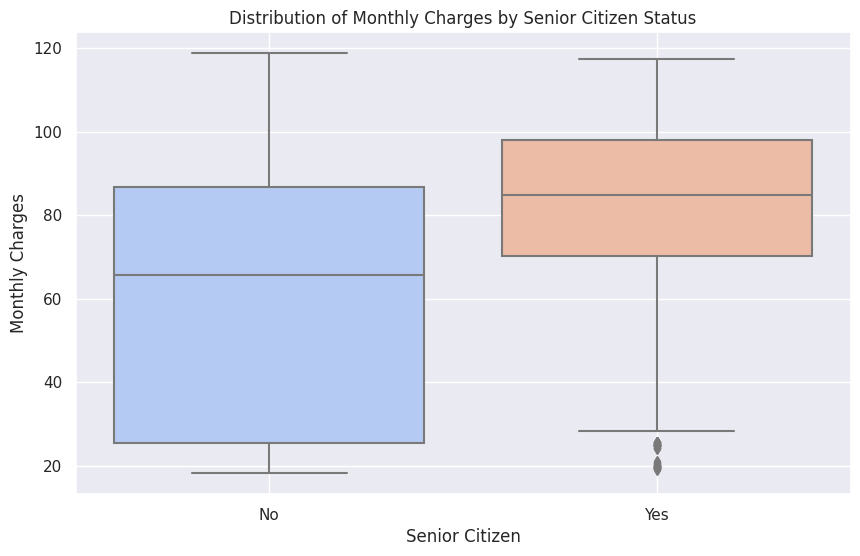

In [42]:
# Plot the distribution of Monthly Charges by Senior Citizen Status column

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Senior Citizen', y='Monthly Charges', data=df, palette='coolwarm')
plt.title('Distribution of Monthly Charges by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

- Senior citizens generally pay more monthly charges than non-senior citizens.

To attract more non-senior citizens to pay higher monthly charges, consider these five strategies:
- Targeted Marketing and Exclusive Offers: Highlight tech-savvy features, exclusive content, and use social media to engage younger demographics.
- Flexible and Customizable Plans: Allow customization, offer bundled packages, and implement flexible pricing models.
- Incentives and Loyalty Programs: Provide discounts for upgrades, loyalty rewards, and special offers for students and young professionals.
- Enhanced Customer Experience and Support: Offer proactive support, user-friendly platforms, and educational campaigns to communicate value.
- Partnerships and Innovative Features: Partner with popular brands, incorporate cutting-edge technology, and offer early access to new features.

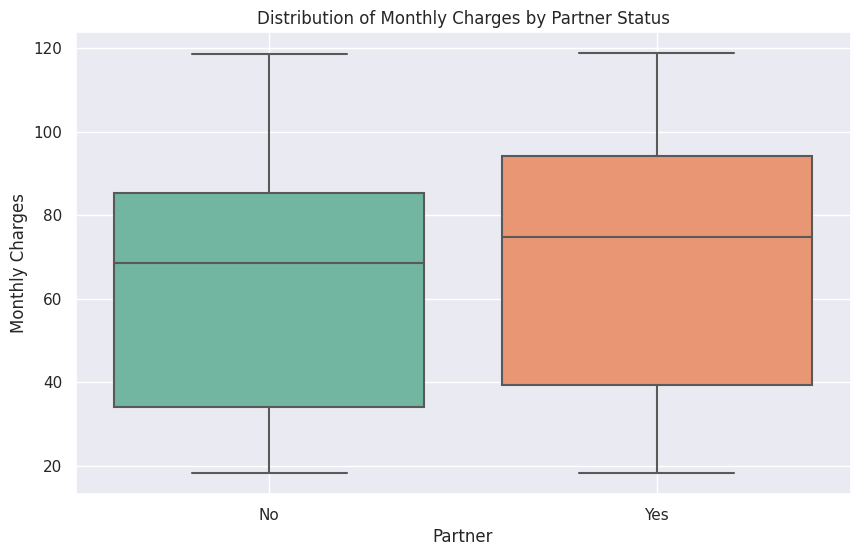

In [43]:
# Plot the distribution of Monthly Charges by Partner Status column

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Partner', y='Monthly Charges', data=df, palette='Set2')
plt.title('Distribution of Monthly Charges by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

- People with partners generally pay more than those who don't have partners.

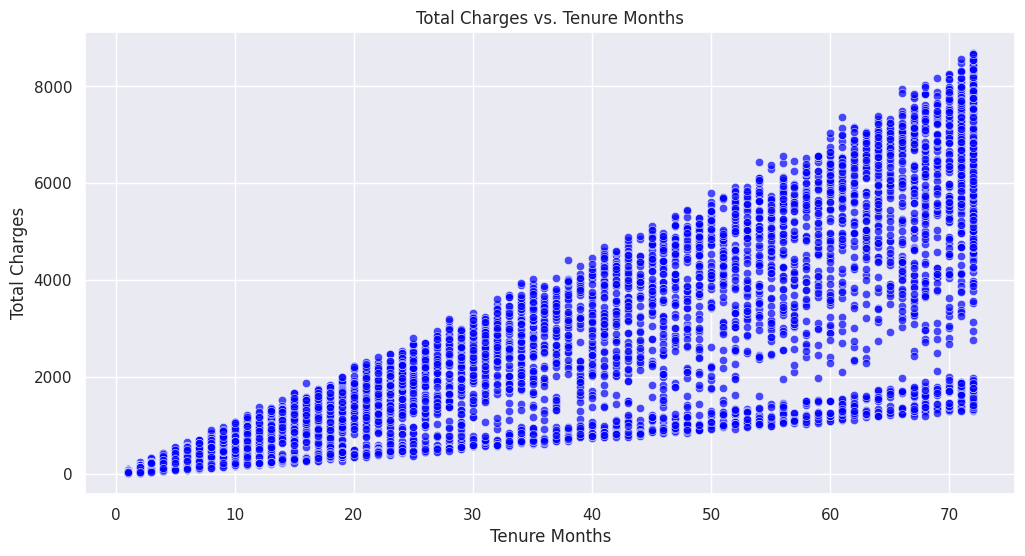

In [44]:
# Plot the distribution of Total Charges vs. Tenure Months column

# Ensure numeric data
df['Tenure Months'] = pd.to_numeric(df['Tenure Months'], errors='coerce')
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['Tenure Months', 'Total Charges'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tenure Months', y='Total Charges', data=df, color='blue', alpha=0.7)
plt.title('Total Charges vs. Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

- Tenure months are directly related to Total charges. 
- The more one stays subscribed the more the total charges increase.

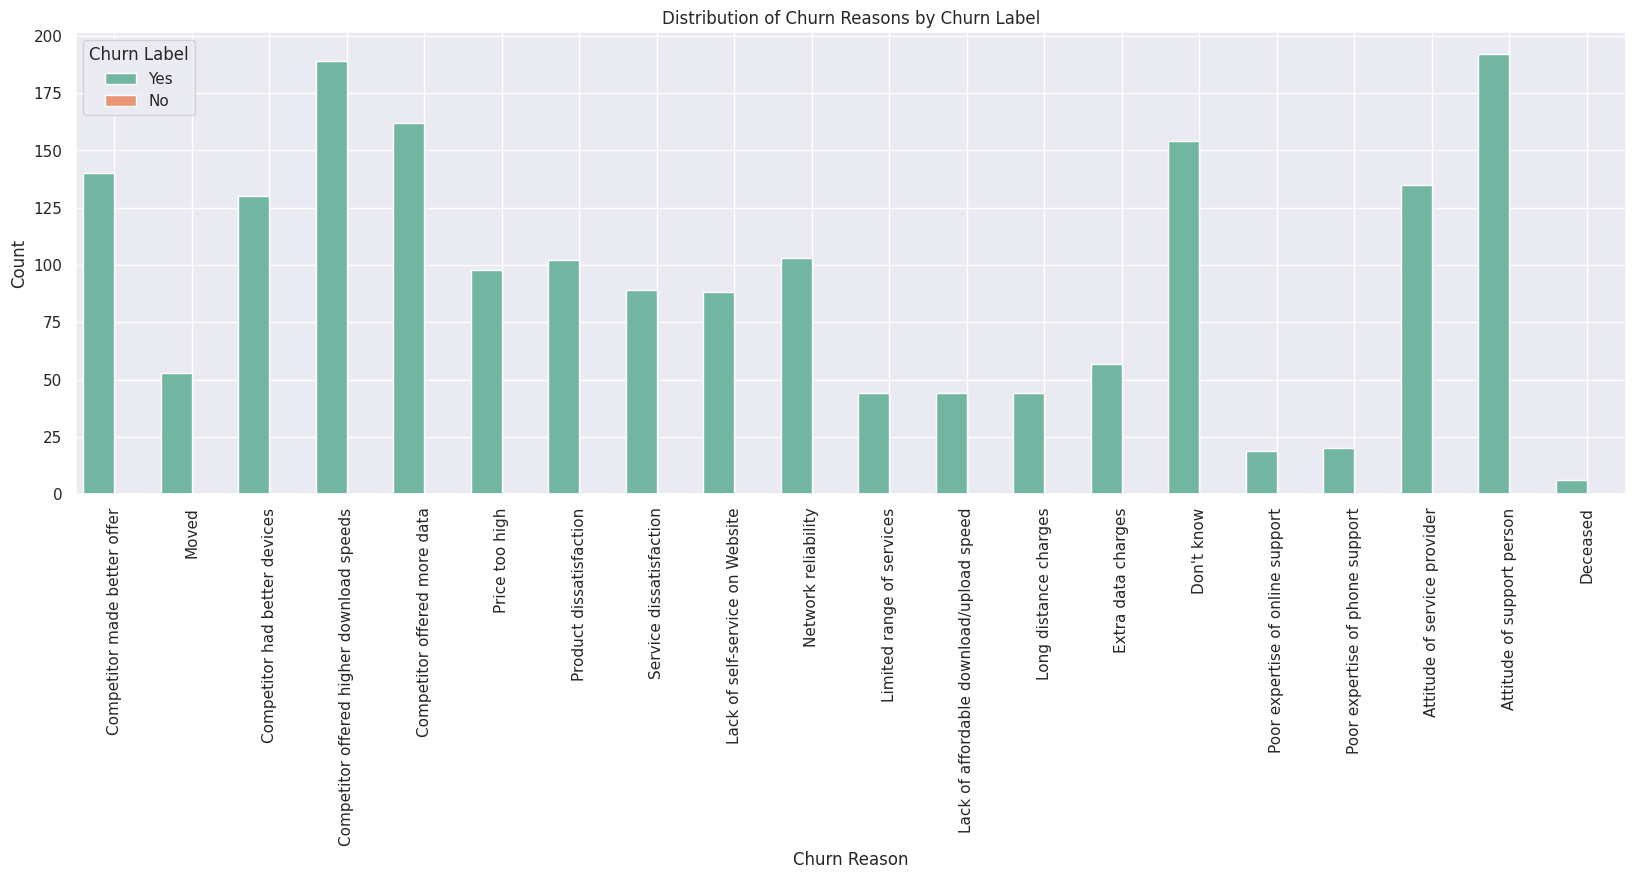

In [45]:
# Plot the distribution of Churn Reasons by Churn Labels column

# Plotting
plt.figure(figsize=(20, 6))
sns.countplot(x='Churn Reason', hue='Churn Label', data=df, palette='Set2')
plt.title('Distribution of Churn Reasons by Churn Label')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()

Top 3 reasons for customer churn are:
- Attitude of support person 
- Competitor offered  higher download speeds
- Competitor offered more data 




To minimize churn:
- We suggest the company should change the support personell, re-train them, or make effort to mitigate by raising the concern to the said personell and make them understand why a good attitude is key for business success.
- The company should look in to ways of offering higher speeds like the competitor(s)... or lower prices for the already offered speeds to compensate on the lack of higher speeds.
- The company should increase the offered data packages in order to compete with rivals ...or lower the prices for the existing packages in order to compensate.

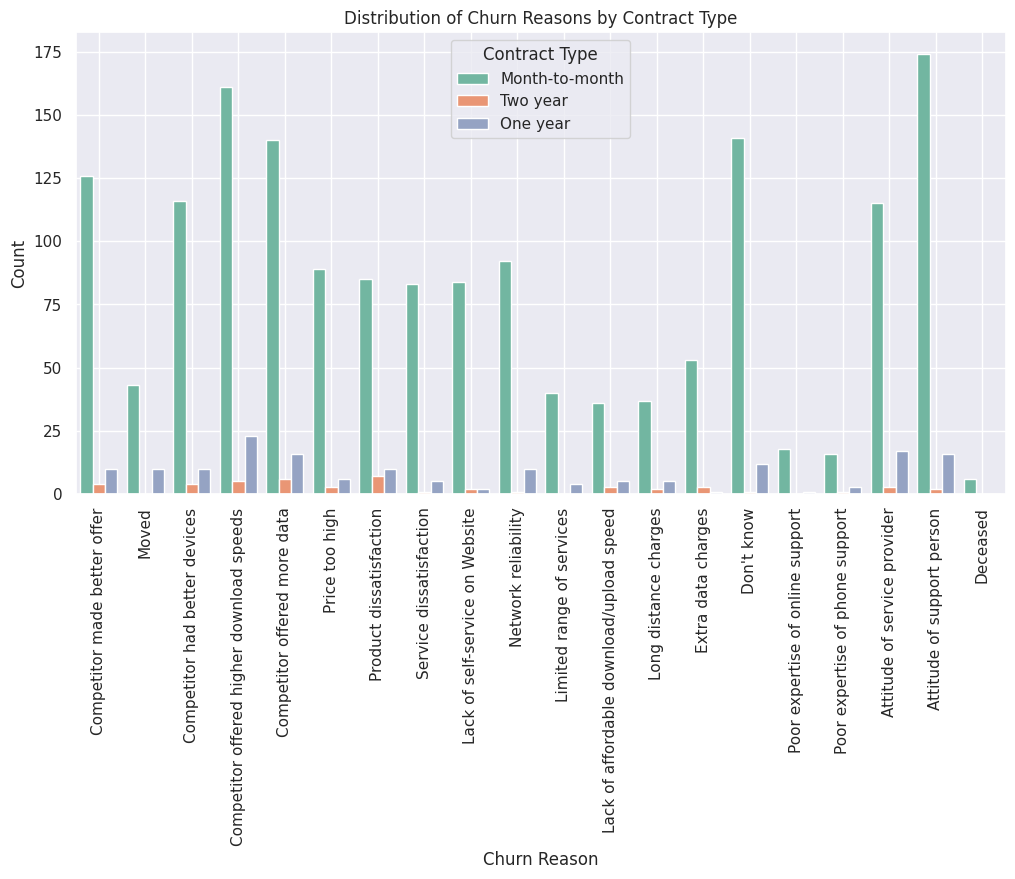

In [46]:
# Plot the distribution of of Churn Reasons by Contract Type column

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn Reason', hue='Contract', data=df, palette='Set2')
plt.title('Distribution of Churn Reasons by Contract Type')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.legend(title='Contract Type')
plt.grid(True)
plt.show()

- Most of the customers who subscribed were on Month-to-Month contracts
- Most of the customers who churned by large numbers were on Month-to-Month contracts

To mitigate this:
- Incentives for Longer-Term Contracts: Offer discounts or bonuses for longer-term commitments.
- Enhance Customer Experience: Improve support and personalize services to boost satisfaction.
- Loyalty Programs: Reward long-term customers with points, discounts, or exclusive perks.
- Flexible Options: Allow easy upgrades, downgrades, and seamless contract transitions.
- Regular Communication and Feedback: Keep customers informed, address pain points, and use feedback for improvements.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


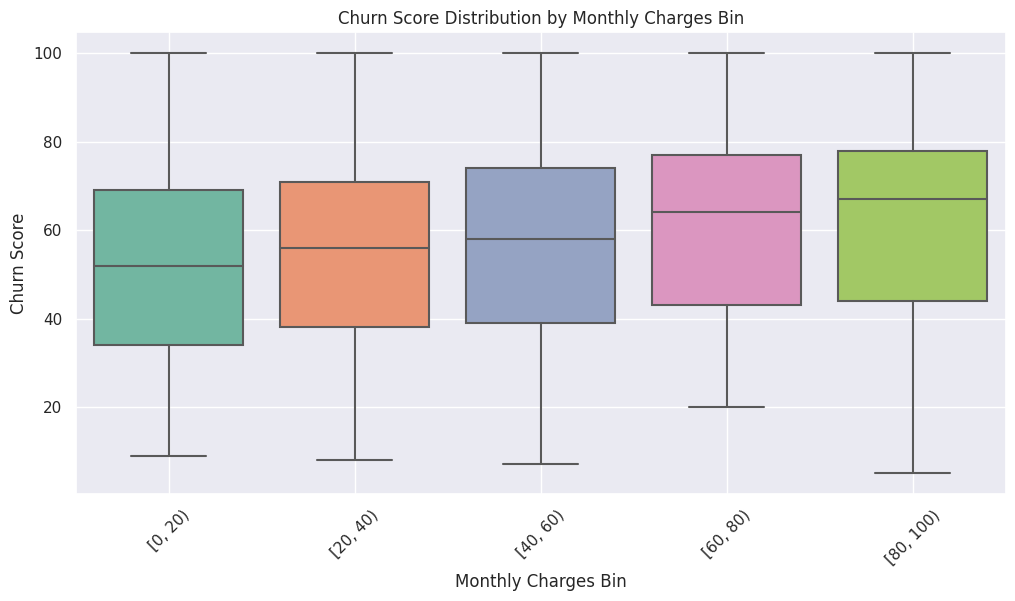

In [47]:
# Plot the Churn Score Distribution by Monthly Charges Bin Type column

# Create bins for Monthly Charges
bins = range(0, 120, 20)  # Bins from 0 to 120 with a width of 20
df['Monthly Charges Bin'] = pd.cut(df['Monthly Charges'], bins=bins, right=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Monthly Charges Bin', y='Churn Score', data=df, palette='Set2')
plt.title('Churn Score Distribution by Monthly Charges Bin')
plt.xlabel('Monthly Charges Bin')
plt.ylabel('Churn Score')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

- Customers who pay higher fees/monthly charges are more likely to churn

To mitigate this: 
- *Enhance Service Value:* Improve services or products by adding new features, enhancing existing ones, or providing exclusive benefits to justify higher fees.
- *Clear Communication:* Clearly articulate the unique benefits and value propositions of higher-priced plans so customers understand what they are paying for.
- *Personalized Offers and Support:* Offer personalized discounts or special offers to high-paying customers at risk of churning and provide proactive, dedicated support.
- *Flexible and Transparent Plans:* Implement flexible plans that allow customers to pay for only what they need and ensure billing is transparent and easy to understand.
- *Regular Feedback and Improvement:* Conduct regular surveys to gather feedback from high-paying customers and use this information to make targeted improvements and stay competitive.

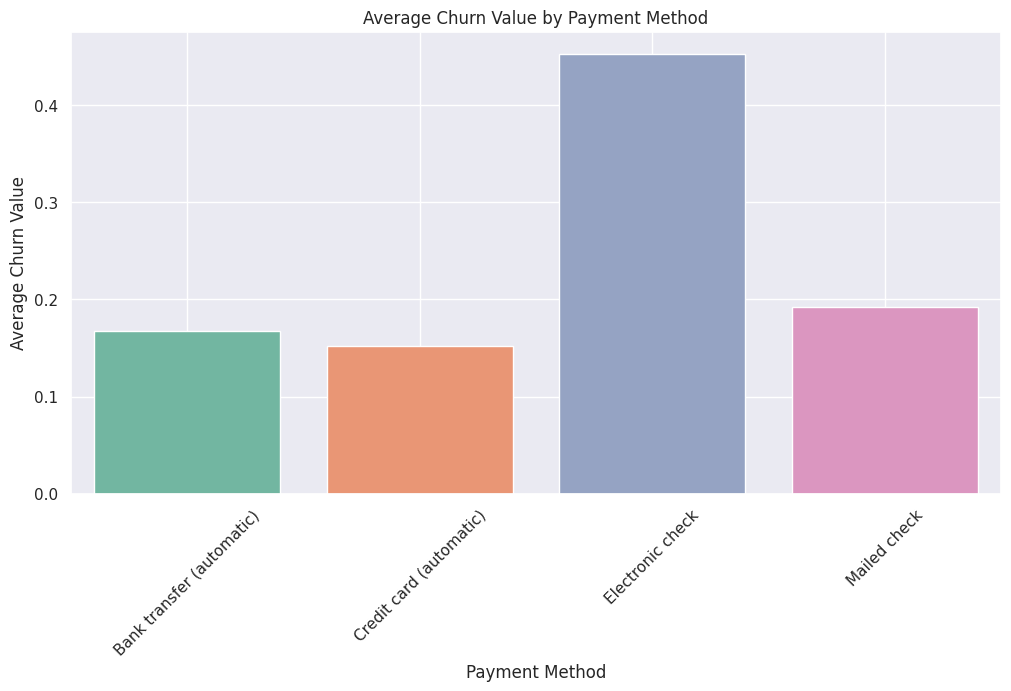

In [48]:
# Plot a graph of Average Churn Value by Payment Method column

# Calculate average churn value for each payment method
avg_churn = df.groupby('Payment Method')['Churn Value'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Churn Value', data=avg_churn, palette='Set2')
plt.title('Average Churn Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Churn Value')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

- Most of the customers who churned were using the Electronic Check method. 

To mitigate this:
- Improve user experience by ensuring the Electronic Check payment process is user-friendly and easy to understand. This might involve a redesign of the payment interface or simplifying the steps
- Provide a variety of payment options such as PayPal and mobile payment solutions to cater to different customer preferences.
-- *Educate customers about the benefits and security of different payment methods. This can help reduce resistance to changing payment habits.*
-- *Provide step-by-step guides or videos on how to set up and use different payment methods*.
- Offer incentives for customers to switch to more reliable payment methods. For instance, provide discounts or loyalty points for using credit cards or automated payments.
- Ensure that customer support is readily available to assist with any payment-related issues. This can help resolve problems quickly and reduce frustration.
- Communicate any updates or changes to the payment process clearly to customers. Transparency helps build trust and reduces confusion.

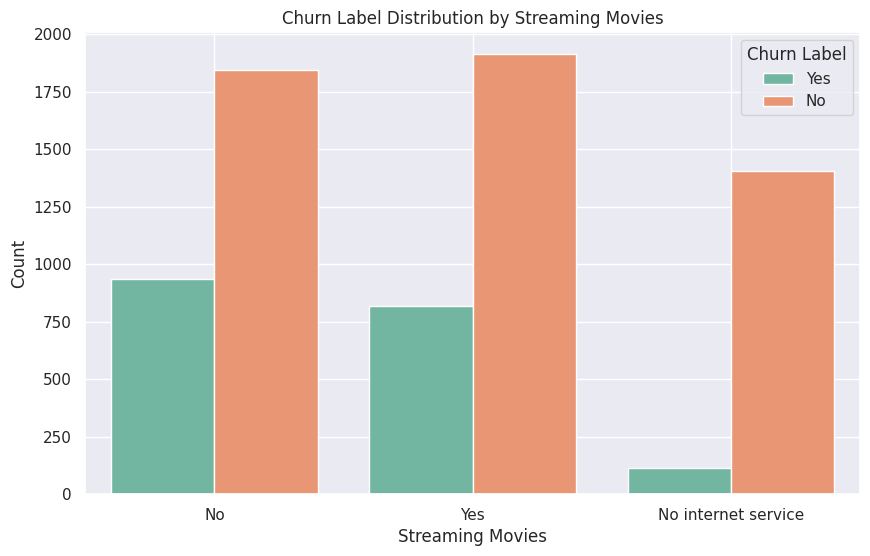

In [49]:
# Plot a graph of Churn Label Distribution by Streaming Movies

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Streaming Movies', hue='Churn Label', data=df, palette='Set2')
plt.title('Churn Label Distribution by Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.legend(title='Churn Label')
plt.grid(True)
plt.show()

- Whether people stream movies or not did not lead customers to churn

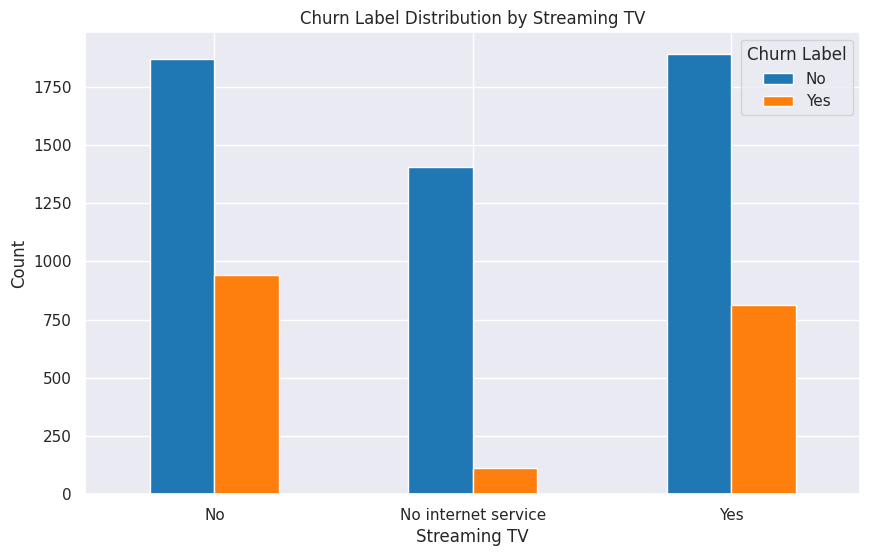

In [50]:
# Plot a graph of Churn Label Distribution by Streaming TV

# Calculate the count of churn labels for each streaming TV status
churn_counts = df.groupby(['Streaming TV', 'Churn Label']).size().unstack().fillna(0)

# Plotting
churn_counts.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Churn Label Distribution by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Churn Label')
plt.grid(True)
plt.show()

- Whether people stream tv or not did not lead customers to churn

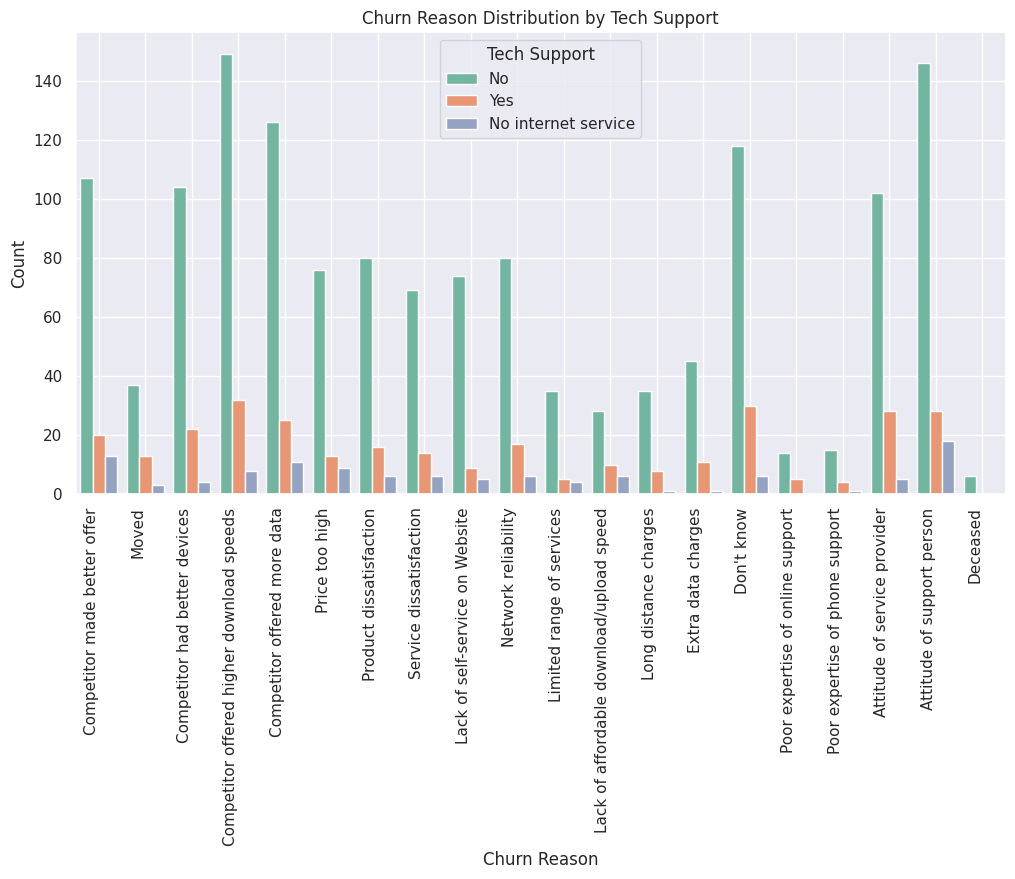

In [51]:
# Plot a graph of Churn Reason Distribution by Tech Support

plt.figure(figsize=(12, 6))
sns.countplot(x='Churn Reason', hue='Tech Support', data=df, palette='Set2')
plt.title('Churn Reason Distribution by Tech Support')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  
plt.legend(title='Tech Support')
plt.grid(True)
plt.show()

- Most of the customers who churned did not have tech support.

To address the high churn rates:
- *Implement Tech Support for All:* Introduce tech support as a standard feature for all customers, ensuring everyone has access to assistance.
- *Promote Tech Support Benefits:* Clearly communicate the availability and benefits of tech support to customers, emphasizing how it can resolve issues and improve their experience.
- *Offer Tiered Tech Support:* Provide basic tech support for all customers, with options to upgrade to more comprehensive support packages if desired.
- *Proactive Support Outreach:* Reach out to customers proactively to offer assistance and check in on any issues they might be facing.
- *Improve Support Accessibility:* Make tech support easily accessible through multiple channels, such as chat, phone, and email, to accommodate different customer preferences.

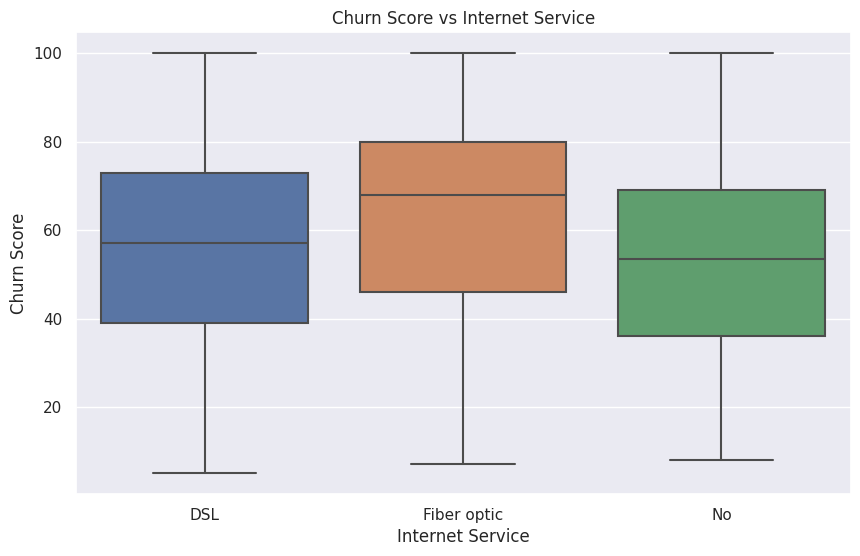

In [52]:
# Plot a graph of Churn Score Distribution by Internet Service

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet Service', y='Churn Score', data=df)
plt.title('Churn Score vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Score')
plt.show()

- Customers with Fibre optic internet service are more likely to churn, followed by DSl and finally customers with no internet service are less likely to churn.

To reduce churn among Fiber optic customers, try these approaches:
- *Address Concerns:* Gather feedback, address issues promptly, and keep customers informed about updates.
- *Offer Incentives:* Provide discounts or rewards to retain Fiber optic customers and implement a loyalty program.


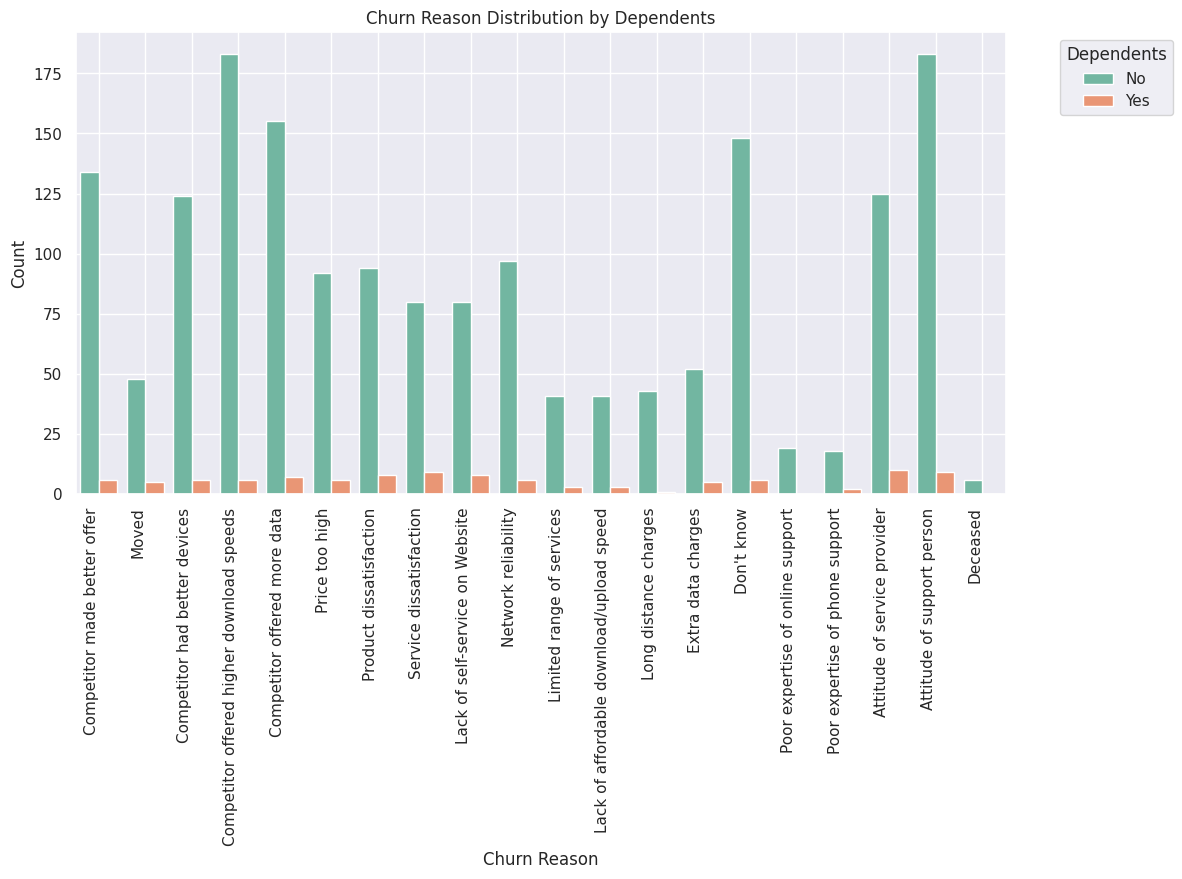

In [53]:
# Plot a graph of Churn Score Distribution by Internet Service

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn Reason', hue='Dependents', data=df, palette='Set2')
plt.title('Churn Reason Distribution by Dependents')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  

# Adjust legend
plt.legend(title='Dependents', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

- People with no dependents had the highest churn rate... it's worth noting that in this oservation, most customers in the data provided didn't have dependents



In [54]:
pd.set_option('display.max_columns', None)

**Encoding**

1. Label Encoding - converts categorical values into integer values. It's useful for ordinal variables or when the categories do not have a meaningful order but are simply identifiers.

In [55]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges  \
0               Yes               Mailed check            53.85   
1               Yes           Electronic check            70.70   
2               Yes           Electronic check            99.65   
3               Yes           Electronic check           104.80   
4               Yes  Bank transfer (automatic)           103.70   

   Total Charges Churn Label  Churn Value  Churn Score  CLTV  \
0         108.15         Yes            1           86  3239   
1         151.65         Yes            1           67  2701   
2         820.50         Yes            1           86  5372   
3        3046.05         Yes            1           84  5003   
4        5036.30         Yes            1           89  5340   

                    Churn Reason Monthly Charges Bin Tenure Months Bin  
0   Competitor made better offer        [40.0, 60.0)           (0, 10]  
1                          Moved        [60.0, 80.0)           (0, 10]  
2                          Moved       [80.0, 100.0)           (0, 10]  
3                          Moved                 NaN          (20, 30]  
4  Competitor had better devices                 NaN          (40, 50]

In [56]:
df.drop(columns=['Count', 'Latitude', 'Longitude', 'Country','State', 'Monthly Charges Bin', 'CustomerID', 'Lat Long', 'Monthly Charges Bin', 'Tenure Months Bin'], inplace=True)

In [57]:
df.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [58]:
df.head()

City  Zip Code  Gender Senior Citizen Partner Dependents  \
0  Los Angeles     90003    Male             No      No         No   
1  Los Angeles     90005  Female             No      No        Yes   
2  Los Angeles     90006  Female             No      No        Yes   
3  Los Angeles     90010  Female             No     Yes        Yes   
4  Los Angeles     90015    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

In [59]:
test = df.drop(['Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)

test.to_csv('test.csv', index=False, sep=',', na_rep='None', float_format='%.2f')

In [60]:
def create_mapping(series):
    unique_values = series.unique()
    return {value: idx for idx, value in enumerate(unique_values)}

# Encoding and preprocessing steps
mappings = {}
categorical_columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
    'Paperless Billing', 'City', 'Internet Service', 'Multiple Lines', 
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 
    'Churn Reason', 'Zip Code', 'Churn Label'
]

for column in categorical_columns:
    mappings[column] = create_mapping(df[column])
    df[column] = df[column].map(mappings[column])

In [61]:
df.head(100)

City  Zip Code  Gender  Senior Citizen  Partner  Dependents  \
0      0         0       0               0        0           0   
1      0         1       1               0        0           1   
2      0         2       1               0        0           1   
3      0         3       1               0        1           1   
4      0         4       0               0        0           1   
..   ...       ...     ...             ...      ...         ...   
95    60        95       0               0        0           0   
96    60        96       1               0        1           0   
97    60        97       0               0        0           0   
98    61        98       0               0        0           0   
99    62        99       0               1        1           0   

    Tenure Months  Phone Service  Multiple Lines  Internet Service  \
0               2              0               0                 0   
1               2              0               0                 1   
2               8              0               1                 1   
3              28              0               1                 1   
4              49              0               1                 1   
..            ...            ...             ...               ...   
95              2              0               1                 1   
96             25              0               1                 1   
97              1              0               0                 0   
98              1              0               1                 1   
99             11              0               0                 2   

    Online Security  Online Backup  Device Protection  Tech Support  \
0                 0              0                  0             0   
1                 1              1                  0             0   
2                 1              1                  1             0   
3                 1              1                  1             1   
4                 1              0                  1             0   
..              ...            ...                ...           ...   
95                1              1                  0             0   
96                1              1                  1             1   
97                1              0                  0             0   
98                1              0                  0             0   
99                2              2                  2             2   

    Streaming TV  Streaming Movies  Contract  Paperless Billing  \
0              0                 0         0                  0   
1              0                 0         0                  0   
2              1                 1         0                  0   
3              1                 1         0                  0   
4              1                 1         0                  0   
..           ...               ...       ...                ...   
95             1                 0         0                  0   
96             1                 1         0                  0   
97             0                 0         0                  1   
98             0                 1         0                  0   
99             2                 2         0                  1   

    Payment Method  Monthly Charges  Total Charges  Churn Label  Churn Value  \
0                0            53.85         108.15            0            1   
1                1            70.70         151.65            0            1   
2                1            99.65         820.50            0            1   
3                1           104.80        3046.05            0            1   
4                2           103.70        5036.30            0            1   
..             ...              ...            ...          ...          ...   
95               1            85.65         181.50            0            1   
96               2           104.95        2566.50          

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7032 non-null   int64  
 1   Zip Code           7032 non-null   int64  
 2   Gender             7032 non-null   int64  
 3   Senior Citizen     7032 non-null   int64  
 4   Partner            7032 non-null   int64  
 5   Dependents         7032 non-null   int64  
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   int64  
 8   Multiple Lines     7032 non-null   int64  
 9   Internet Service   7032 non-null   int64  
 10  Online Security    7032 non-null   int64  
 11  Online Backup      7032 non-null   int64  
 12  Device Protection  7032 non-null   int64  
 13  Tech Support       7032 non-null   int64  
 14  Streaming TV       7032 non-null   int64  
 15  Streaming Movies   7032 non-null   int64  
 16  Contract           7032 non-n

In [63]:
df.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

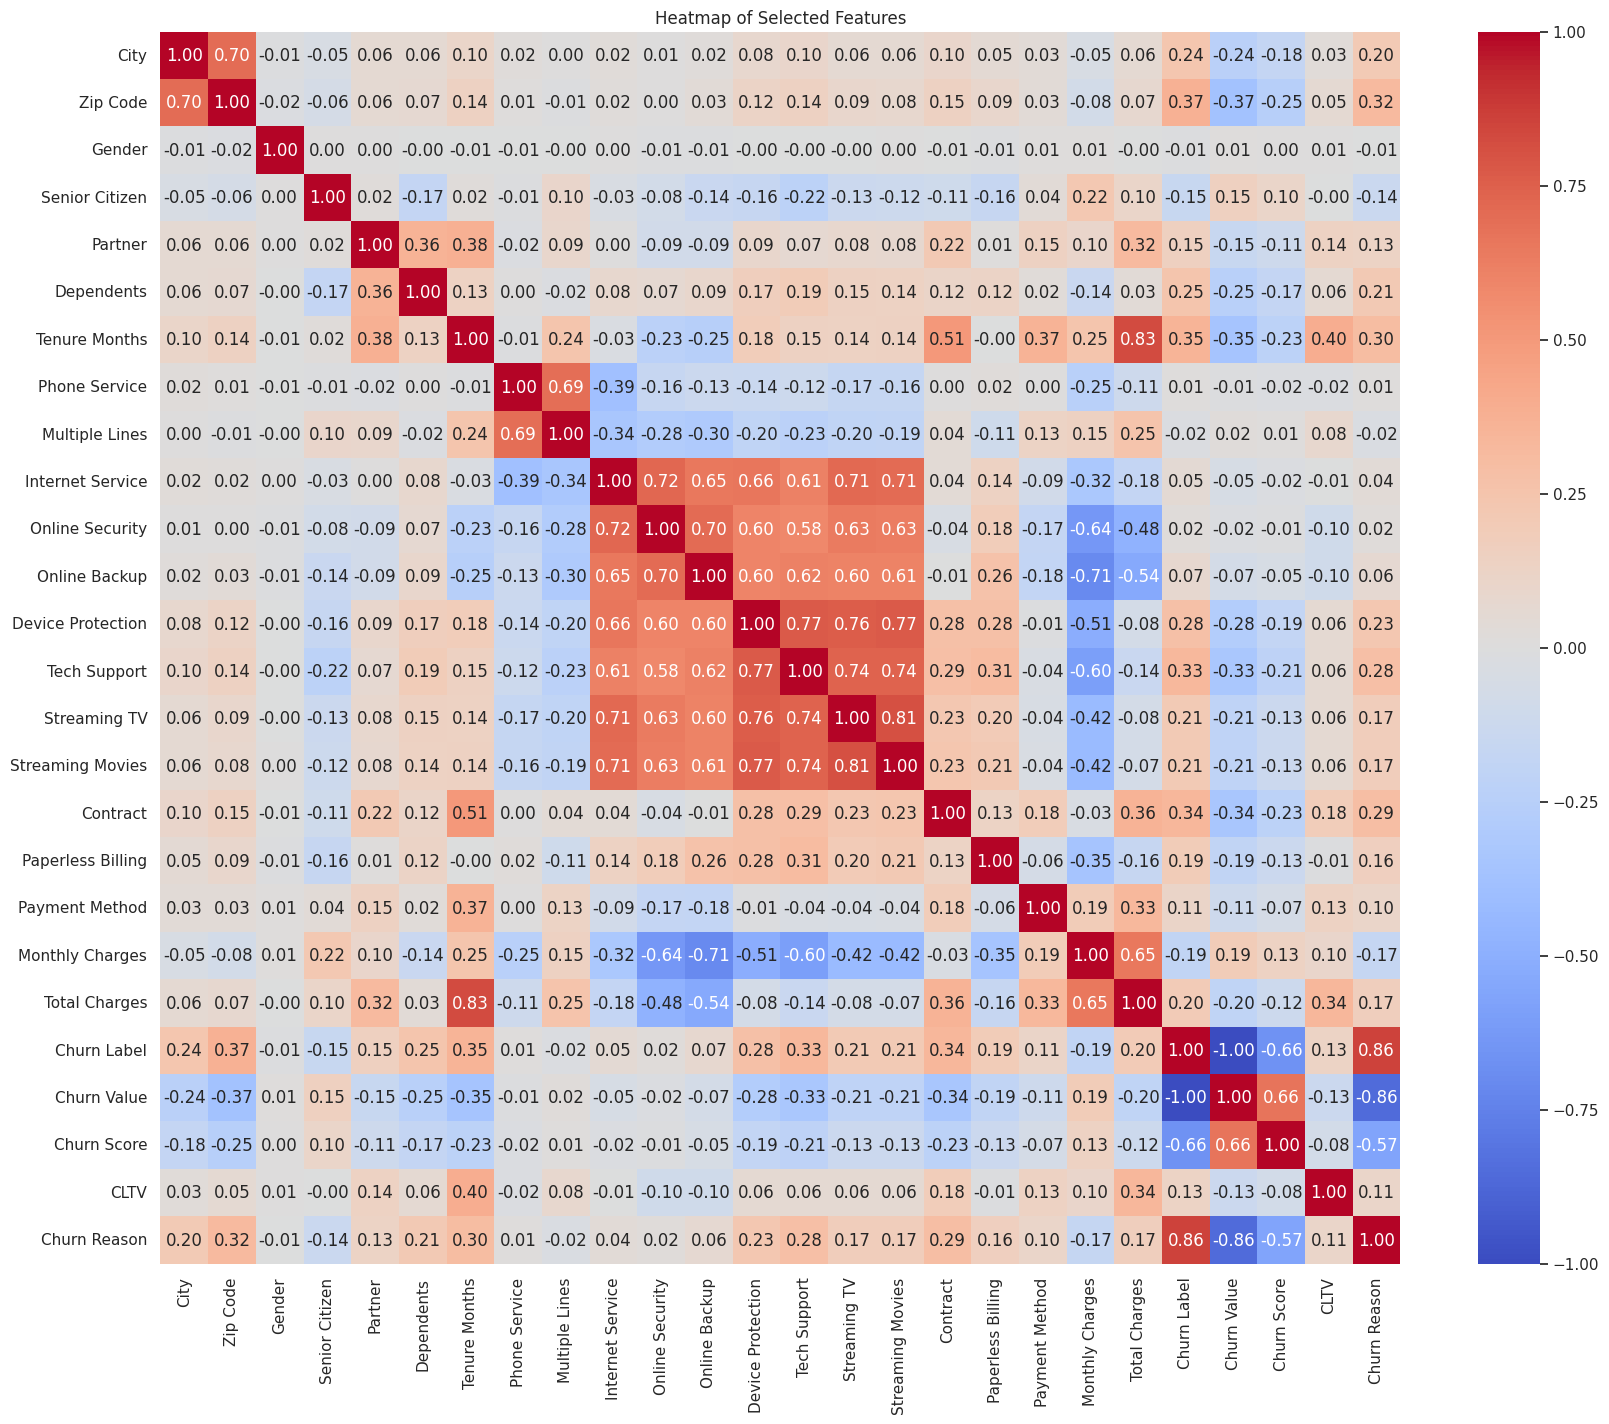

In [64]:
# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Selected Features')
plt.show()


In [65]:
df.describe()

City     Zip Code       Gender  Senior Citizen      Partner  \
count  7032.000000  7032.000000  7032.000000     7032.000000  7032.000000   
mean    440.011519   817.247156     0.495307        0.162400     0.482509   
std     339.631647   476.665010     0.500014        0.368844     0.499729   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%     138.000000   412.000000     0.000000        0.000000     0.000000   
50%     376.000000   816.000000     0.000000        0.000000     0.000000   
75%     720.250000  1225.250000     1.000000        0.000000     1.000000   
max    1128.000000  1651.000000     1.000000        1.000000     1.000000   

        Dependents  Tenure Months  Phone Service  Multiple Lines  \
count  7032.000000    7032.000000    7032.000000     7032.000000   
mean      0.230375      32.421786       0.096701        0.615330   
std       0.421103      24.545260       0.295571        0.655867   
min       0.000000       1.000000       0.000000        0.000000   
25%       0.000000       9.000000       0.000000        0.000000   
50%       0.000000      29.000000       0.000000        1.000000   
75%       0.000000      55.000000       0.000000        1.000000   
max       1.000000      72.000000       1.000000        2.000000   

       Internet Service  Online Security  Online Backup  Device Protection  \
count       7032.000000      7032.000000    7032.000000        7032.000000   
mean           0.872582         0.929608       0.871303           0.776166   
std            0.737271         0.705562       0.737917           0.778542   
min            0.000000         0.000000       0.000000           0.000000   
25%            0.000000         0.000000       0.000000           0.000000   
50%            1.000000         1.000000       1.000000           1.000000   
75%            1.000000         1.000000       1.000000           1.000000   
max            2.000000         2.000000       2.000000           2.000000   

       Tech Support  Streaming TV  Streaming Movies     Contract  \
count   7032.000000   7032.000000       7032.000000  7032.000000   
mean       0.722412      0.816695          0.820677     0.658276   
std        0.795571      0.762952          0.761287     0.802308   
min        0.000000      0.000000          0.000000     0.000000   
25%        0.000000      0.000000          0.000000     0.000000   
50%        1.000000      1.000000          1.000000     0.000000   
75%        1.000000      1.000000          1.000000     1.000000   
max        2.000000      2.000000          2.000000     2.000000   

       Paperless Billing  Payment Method  Monthly Charges  Total Charges  \
count        7032.000000     7032.000000      7032.000000    7032.000000   
mean            0.407281        1.423777        64.798208    2283.300441   
std             0.491363        1.064493        30.085974    2266.771362   
min             0.000000        0.000000        18.250000      18.800000   
25%             0.000000        1.000000        35.587500     401.450000   
50%             0.000000        1.000000        70.350000    1397.475000   
75%             1.000000        2.000000        89.862500    3794.737500   
max             1.000000        3.000000       118.750000    8684.800000   

       Churn Label  Churn Value  Churn Score         CLTV  Churn Reason  
count  7032.000000  7032.000000  7032.000000  7032.000000   7032.000000  
mean      0.734215     0.265785    58.715301  4401.445108     16.917378  
std       0.441782     0.441782    21.531321  1182.414266      5.970617  
min       0.000000     0.000000     5.000000  2003.000000      0.000000  
25%       0.000000     0.000000    40.000000  3469.750000     18.000000  
50%       1.000000     0.000000    61.000000  4527.500000     20.000000  
75%       1.000000     1.000000    75.000000  5381.000000     20.000000  
max       1.000000     1.000000   100.000000  6500.000000     20.000000

**Separating Features and Targets**

In [66]:
# Separate the DataFrame df into two parts: X contains all the features (by dropping the 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason' columns), and Y contains the 'income' column (the target variable). 
# -- This separation is typically done in preparation for training a machine learning model.

X = df.drop(['Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
y = df['Churn Value']

In [67]:
X.to_csv('X_Churn.csv', index=False, sep=';', na_rep='None', float_format='%.2f')

**Scaling the data**

In [68]:
# Standardize numerical features
scaler = StandardScaler()

In [69]:
# Transform the training and testing data
X_scaled = scaler.fit_transform(X)

**Split data into training and testing data**

In [70]:
# Split the dataset into training and testing sets. 
# -- Specifically, 80% of the data is allocated for training, and 20% is allocated for testing, with a random seed to ensure reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(7032, 21) (5625, 21) (1407, 21)


**Model training: Random Forest Classifier**

In [72]:
# Instantiate Random Forest Classifier

rfc = RandomForestClassifier(random_state=42)

In [73]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Prediction**

In [74]:
# Predict the labels for the testing data using the trained Random Forest Classifier model rfc and store it.

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]

**Model Evaluation**

In [75]:
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc}')

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1012
           1       0.74      0.67      0.70       395

    accuracy                           0.84      1407
   macro avg       0.81      0.79      0.80      1407
weighted avg       0.84      0.84      0.84      1407

ROC-AUC: 0.905742482613699


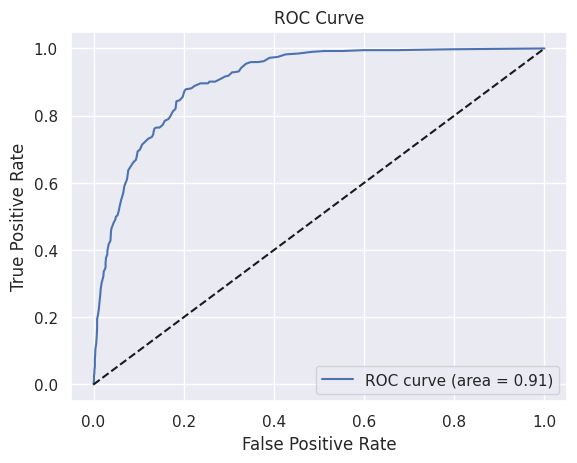

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

**Feature Importance**

In [77]:
# Feature Importance
importances = rfc.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
1            Zip Code    0.191313
0                City    0.114592
20      Total Charges    0.113752
6       Tenure Months    0.106260
19    Monthly Charges    0.101760
16           Contract    0.077555
13       Tech Support    0.036297
5          Dependents    0.033927
18     Payment Method    0.033085
9    Internet Service    0.024315
10    Online Security    0.022281
11      Online Backup    0.019993
12  Device Protection    0.017840
14       Streaming TV    0.015907
2              Gender    0.015870
17  Paperless Billing    0.015741
15   Streaming Movies    0.015503
4             Partner    0.014883
8      Multiple Lines    0.013529
3      Senior Citizen    0.012074
7       Phone Service    0.003524


**Building a predictive system**

In [78]:
# Function to preprocess input data
def preprocess_input(data, mappings, scaler, feature_columns):
    input_df = pd.DataFrame([data], columns=[
        'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 
        'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 
        'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
        'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 
        'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 
        'Churn Score', 'CLTV', 'Churn Reason'
    ])
    
    # Drop columns not used in training
    columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Latitude', 'Longitude']
    input_df = input_df.drop(columns_to_drop, axis=1)
    
    # Encode categorical variables using the mappings
    for column in mappings:
        if column in input_df.columns:
            input_df[column] = input_df[column].map(mappings[column])
    
    # Ensure the input_df has the same columns as the feature_columns used in training
    input_df = input_df.reindex(columns=feature_columns, fill_value=0)
    
    # Scale the input data
    input_scaled = scaler.transform(input_df)
    return input_scaled

# Input data
data = ['3668-QPYBK', 1, 'United States', 'California', 'Los Angeles', 90003, "33.964131, -118.272783", 33.96, -118.27, 'Male', 'No', 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.85, 108.15, 'Yes', 1, 86, 3239, 'Competitor made better offer']

# Get feature columns used in training
feature_columns = X.columns

# Preprocess the input data
input_scaled = preprocess_input(data, mappings, scaler, feature_columns)

# Predict the churn
prediction = rfc.predict(input_scaled)
print('Prediction:', prediction)

if prediction[0] == 0:
    print('This person is not likely to churn')
else:
    print('This person is more likely to churn')

Prediction: [1]
This person is more likely to churn


# Summary of Findings and Mitigation Strategies
Several important insights regarding customer churn have been uncovered as a result of the analysis. The following provides a thorough overview of the results and suggested approaches to deal with them:

**1. High Churn Rate in the First Month**

*Finding:* A significant portion of customers churn within the first month, but those who stay beyond this period are likely to remain for a much longer duration.

*Mitigation Strategies:*

Seamless Onboarding: Simplify the onboarding process with clear guidance and a welcome package.
Initial Engagement: Offer incentives for the first month and conduct personalized check-ins.
Proactive Support: Provide responsive and dedicated support to resolve issues promptly.
Value Demonstration: Clearly communicate the key benefits and set usage milestones with rewards.
Feedback and Improvement: Continuously enhance the onboarding experience based on customer feedback.

**2. Monthly Charges and Dependent Status**

*Finding:* Customers with dependents generally pay less monthly, and those without dependents tend to have higher monthly charges. Customers with higher charges generally stay longer.

*Mitigation Strategies:*

Family Plans: Introduce discounted family plans or bundled services.
Customizable Packages: Allow customers to customize packages based on their needs.
Incentives for High Usage: Offer incentives for high-usage customers without dependents.
Usage-Based Pricing: Implement pricing based on actual usage to ensure fairness.
Education: Educate customers about optimizing their plans to get the best value.

**3. Contract Types and Churn**

*Finding:* The majority of customers are on Month-to-Month contracts, and these customers churn at higher rates.

*Mitigation Strategies:*

Incentives for Long-Term Contracts: Offer discounts or bonuses for longer-term commitments.
Enhance Customer Experience: Improve support and personalize services.
Loyalty Programs: Reward long-term customers with points, discounts, or exclusive perks.
Flexible Options: Allow easy plan transitions and upgrades.
Regular Communication: Keep customers informed and address their concerns regularly.

**4. Impact of Senior Citizenship and Payment Methods**

*Finding:* Senior citizens generally pay more monthly and might be targeted differently. Electronic Check users have a higher churn rate.

*Mitigation Strategies:*

Targeted Marketing: Highlight features appealing to younger demographics and offer exclusive content.
Flexible Plans: Provide customizable plans and incentives for upgrades.
Payment Options: Improve the Electronic Check process and offer a variety of payment options.
Educate and Incentivize: Educate customers about payment methods and offer incentives to switch to more reliable options.

**5. Internet Service Types and Churn**

*Finding:* Fiber optic internet users have higher churn rates compared to DSL and no internet service users.

*Mitigation Strategies:*

Address Concerns: Gather feedback and address issues affecting Fiber optic customers.
Incentives: Offer discounts or rewards to retain Fiber optic customers.

**6. General Observations**

*Finding:* Customers with no dependents have the highest churn rates, and there are high concentrations of customers in major cities.

*Mitigation Strategies:*

Targeted Strategies: Develop city-specific strategies and understand the unique needs of customers with no dependents.
Community Engagement: Build community ties in major cities and enhance local customer experiences.

**Conclusion**

To reduce churn and improve retention, it is crucial to implement targeted strategies addressing the specific needs and behaviors of different customer segments. By focusing on improving onboarding, offering tailored incentives, and enhancing customer support, the company can mitigate churn rates and enhance long-term customer satisfaction. Regular feedback and adaptive strategies will help in continuously refining these approaches for optimal results.